# Making Predictions of Underwater Ocean Temperature Using Historical Data

Author: Pamela Martinez

Course Project, UC Irvine, Math 10, S23

## Introduction

In this project, I will be analyzing the behavior of ocean temperature based on historical data to understand if the ocean water tempertaures are heating up or cooling down. Understanding the fluctuating heat temperatures are important to learn about because the temperature in the ocean is what helps the ocean environment thrive so any change in temperature can cause the death of many marine life. Also, understanding the temperatures of the ocean gives us a better understanding about the global climate change that is occurring.

## Uploading and Cleaning up data

In [89]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
df = pd.read_csv("underwater_temperature.csv")[:2000]
df

,ID,Site,Latitude,Longitude,Date,Time,Temp (�C),Depth
0,1,Ilha Deserta,27.2706,48.331,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.331,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.331,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.331,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.331,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
1995,1996,Ilha Deserta,27.2706,48.331,2013/03/20,5:13:17,24.351,12.0
1996,1997,Ilha Deserta,27.2706,48.331,2013/03/20,5:33:18,24.351,12.0
1997,1998,Ilha Deserta,27.2706,48.331,2013/03/20,5:53:19,24.351,12.0
1998,1999,Ilha Deserta,27.2706,48.331,2013/03/20,6:13:20,24.351,12.0


In [74]:
#Checking if the dataframe has any missing values
df.isnull().values.any()

False

In [75]:
df.shape

(2000, 8)

Now that we have our dataset, we need to clean it up. I will be deleting the `date` and `Time`column since it will not be needed.

In [76]:
df.drop(["Date", "Time", "ID","Site"], axis=1,inplace=True)
df.dropna(inplace=True)

In [77]:
df.head()

,Latitude,Longitude,Temp (�C),Depth
0,27.2706,48.331,24.448,12.0
1,27.2706,48.331,24.448,12.0
2,27.2706,48.331,24.545,12.0
3,27.2706,48.331,24.448,12.0
4,27.2706,48.331,24.351,12.0


Now I will change the `"Temp (�C)"` column to `"Temp"` so the dataframe can look much more cleaner.

In [78]:
df.rename(columns = {"Temp (�C)":"Temp"}, inplace=True)

In [79]:
df.head()

,Latitude,Longitude,Temp,Depth
0,27.2706,48.331,24.448,12.0
1,27.2706,48.331,24.448,12.0
2,27.2706,48.331,24.545,12.0
3,27.2706,48.331,24.448,12.0
4,27.2706,48.331,24.351,12.0


Now that we have our dataframe, we can explore its features. Then using the `plt.hist` it generates a histogram using the target column we will be working with, in this case "Temp", with bin width 20 to get a better visualization of the fluxuation of temperature.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   2000 non-null   float64
 1   Longitude  2000 non-null   float64
 2   Temp       2000 non-null   float64
 3   Depth      2000 non-null   float64
dtypes: float64(4)
memory usage: 78.1 KB


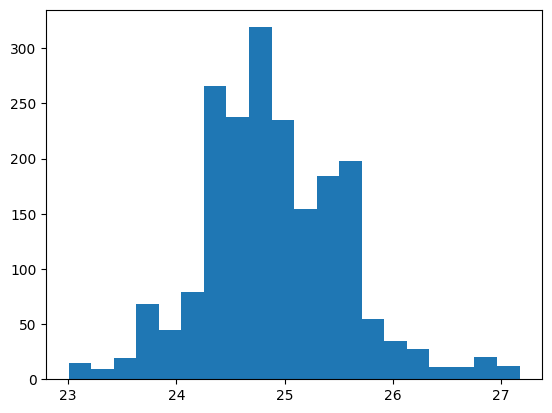

In [80]:
df.info()
df.describe()
plt.hist(df['Temp'], bins=20)
plt.show()

## Machine Learning


### Random Forest Regression

Now that we have our dataset, we need to prepare it for regression.

In [81]:
features = [col for col in df.columns if is_numeric_dtype(df[col]) and col != "Temp"]

In [82]:
X = df[features]
y = df["Temp"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=9
)

Now that I have split the data into the train set and the test set we can start the exploration with predicting ocean temperature values. First we will use `LinearRegression` to observe the linear relationship between tempertaure and longtitude, latitude, and depth.

In [84]:
lin = LinearRegression()
lin.fit(df[features], df["Temp"])

LinearRegression()

In [85]:
df["Lin_Pred"] = lin.predict(df[features])

In [86]:
pd.Series(lin.coef_, index=lin.feature_names_in_)

Latitude    -6.555406e+26
Longitude   -1.638851e+26
Depth        0.000000e+00
dtype: float64

Now that we have the `LinearRegression` part, we can fit our data into the LinearRegression model to have our linear predicted values for temperature.

In [113]:
lin.fit(X_train, y_train)

# Predict using the test set
y_lin_pred = lin.predict(X_test)

# Calculate the root mean squared error (RMSE)
mse_lin = mean_squared_error(y_test, y_lin_pred)
rmse_lin = np.sqrt(mse_lin)
rmse_lin


0.6389837292969595

In [122]:
alt.Chart(df).mark_circle(color="purple").encode(
    x = "Temp",
    y = "Lin_Pred"
)

alt.Chart(...)

Based on the altair chart above, it does not seem like there is much to see, however, based on the actual temperatures we can see that the predicted temperatures falls close in the range of the predicted temperatures.

### Random Forest Regression

Next, I will use `RandomForestRegression` to see if there is any non-linear relationships between our features and the target variable, which is something LinearRegression fails to accurately predict since it focuses on the linear relationship. By also using Randon Forest Reegression, it is less prone to overfitting the data and handles potential missing values or outliers in our data.

In [93]:
rfr = RandomForestRegressor(random_state=14)
rfr.fit(df[features], df["Temp"])

RandomForestRegressor(random_state=14)

In [94]:
df["Rfr_pred"] = rfr.predict(df[features])

In [123]:
rfr.fit(X_train, y_train)
# Predict using the test set
y_rfr_pred = rfr.predict(X_test)

# Calculate the root mean squared error (RMSE)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rmse_rfr = np.sqrt(rfr_mse)
rmse_rfr

0.6390578648446843

In [104]:
alt.Chart(df).mark_circle().encode(
    x = "Temp",
    y = "Rfc_pred:N"
).properties(
    height = 60
)

alt.Chart(...)

In comparision to the linear regression model, the random forest regression model is similar but the only thing that makes it differnt is that it does not have a defined value of depth for where the temperature is similar to the actual temperature.

### K-Nearest Regression


Now that I have used both Linear Regression and Random Forest Regression models, I will use the K-Nearest Regression model. The K-Nearest Regression model makes the predicted based on the average of the target values of its K- nearest neighbors.

In [116]:
knn = KNeighborsRegressor()
knn.fit(df[features], df["Temp"])

KNeighborsRegressor()

In [117]:
df["Knn_pred"] = knn.predict(df[features])

In [114]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using the test set
y_knn_pred = knn.predict(X_test)

# Calculate the root mean squared error (RMSE)
mse_knn = mean_squared_error(y_test, y_knn_pred)
rmse_knn = np.sqrt(mse_knn)
rmse_knn

0.7402467899288725

In [119]:
alt.Chart(df).mark_circle().encode(
    x = "Temp",
    y = "Knn_pred"
)

alt.Chart(...)

In comparison to the Linear Regression and Random Forest Regression chart, the K-Nearest Neighbor Regression chart seems to be the most accurate one out of the three. The K-Nearest Neighbor Regression takes into consideration the outliers and avoids overfitting the data, so at this point of the data analysis the KNN model fits the data best to predict ocean temperatures.

### Comparing Models

Now we will visually see with plotting a scatter plot with plotly which model is the best fit to predict ocean underwater temperatures.

In [112]:
#Comparing Mean Values First to see which one has more accuracy
print("Linear regression RMSE:", rmse_lin)
print("RandomForestRegression RMSE", rmse_rfr)
print("KNN regression RMSE:", rmse_knn)

Linear regression RMSE: 0.6389837292969595
RandomForestRegression RMSE 0.6390578648446843
KNN regression RMSE: 0.7402467899288725


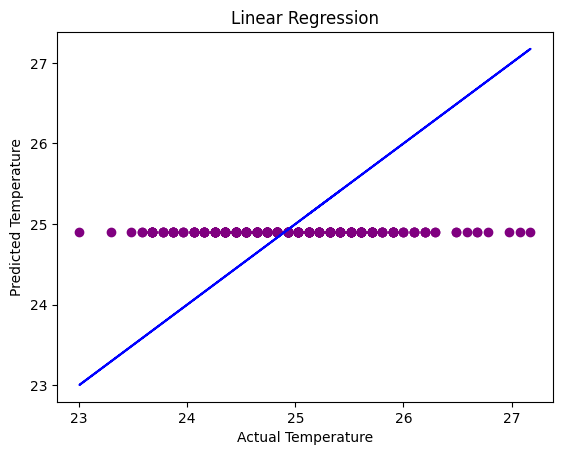

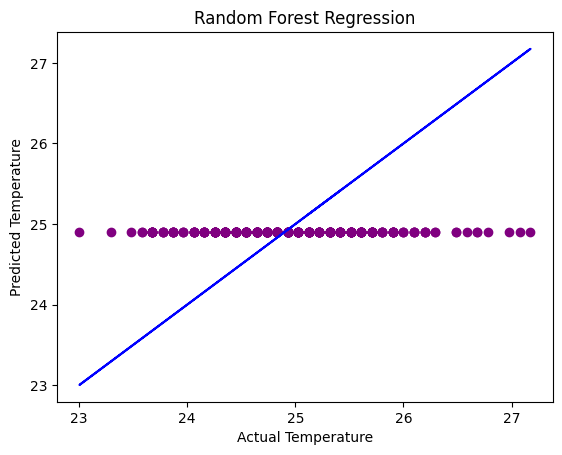

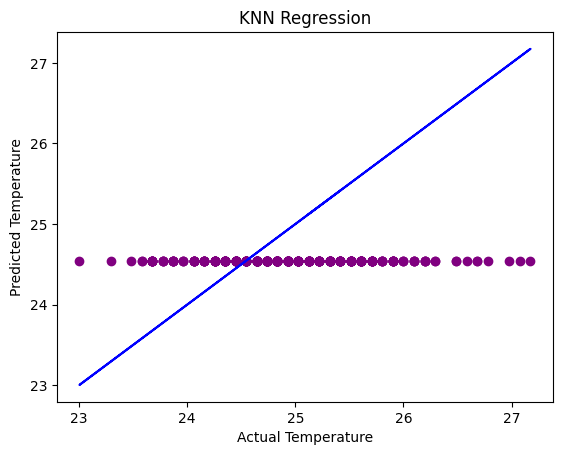

In [128]:
# Visualizing actual vs predicted values for linear regression
plt.scatter(y_test, y_lin_pred, color='purple')
plt.plot(y_test, y_test, color='blue')
plt.title('Linear Regression')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

# Visualizing actual vs predicted values for random forest regression
plt.scatter(y_test, y_rfr_pred, color = 'purple')
plt.plot(y_test, y_test, color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

# Visualizing the actual vs predicted values for KNN regression
plt.scatter(y_test, y_knn_pred, color='purple')
plt.plot(y_test, y_test, color='blue')
plt.title('KNN Regression')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()


## Summary

By plotting the three scatter plots, we can see that the KNN Regression model has the most accurate predictions when it comes to predicting underwater ocean temperature based on location and depth. The Linear and Random Forest Regression models are very similiar and almost identical but when it comes to the accuracy in the "RSME" value, the Random Forest Regression predictions are more accurate than the Linear Regression Model. I think when it comes to predicting more speficic and non-linear relationship data, such as for the ocean underwater temperature, using KNN Regression models give more accuracy because it takes outliers and overfitting into consideration. Therefore, predicting ocean temperatures using historical data is more accurate when using KNN Regression models which will be helpful when understanding the changes in the ocean temperature to keep in mind how hot it is becoming before it becomes a natural disaster for the environment and marine life.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

The source of my datasets from datasets that were uploaded to Kaggle:
* Ocean temperature - https://www.kaggle.com/datasets/shivamb/underwater-surface-temperature-dataset

* List any other references that you found helpful.

Some references that I found most helpful where:
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
* https://plotly.com/python/#ai-ml
* https://www.digitalocean.com/community/tutorials/k-nearest-neighbors-knn-in-python

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82a19f87-d5fa-44a9-92a1-2d1818da0e5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>